In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-quality/winequalityN.csv


In [2]:
# STEP 1, after the dataset is loaded, necessary controls and directions are created and
# The step in which we will perform the removal of missing or unnecessary parts from the data set

# import startup libraries
import pandas as pd
import numpy as np

In [3]:
# load dataset
wine = pd.read_csv('/kaggle/input/wine-quality/winequalityN.csv')

# get information about the dataset
wine.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
# Let's check the values ​​of the features in the dataset. I found 1 sufficient as I am on step 1.
wine.quality.unique()


array([6, 5, 7, 8, 4, 3, 9])

In [5]:
# Check for null values ​​in the dataset
wine.isnull().sum()


type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [6]:
# Since there are very few zeros in the dataset, I decided to replace it with nulls when averaging the features.
wine.mean()
wine_mean = wine.fillna(wine.mean())

/tmp/ipykernel_32/4081047920.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  wine.mean()
/tmp/ipykernel_32/4081047920.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  wine_mean = wine.fillna(wine.mean())


In [7]:
# check if null value remains
wine_mean.isnull().sum()
wine_mean.info()

# Check if wine and wine_mean averages are the same
print(wine.mean())
print(wine_mean.mean())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB
fixed acidity             7.216579
volatile acidity          0.

/tmp/ipykernel_32/1535573005.py:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(wine.mean())
/tmp/ipykernel_32/1535573005.py:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(wine_mean.mean())


In [8]:
# Here, null values ​​are dropped and the white place is set to 1 and the red place to 0 in the wine type column.
wine1 = wine.dropna()
wine1['whitewine'] = [
    1 if typ == 'white' else 0 for typ in wine1['type']]
wine1.drop(['type'], axis=1, inplace=True)


/tmp/ipykernel_32/1968481694.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine1['whitewine'] = [
/tmp/ipykernel_32/1968481694.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine1.drop(['type'], axis=1, inplace=True)


In [9]:
# copy the dataset
def preprocess_inputs(df):
    df = df.copy()
    
    return df
df1 = preprocess_inputs(wine1)

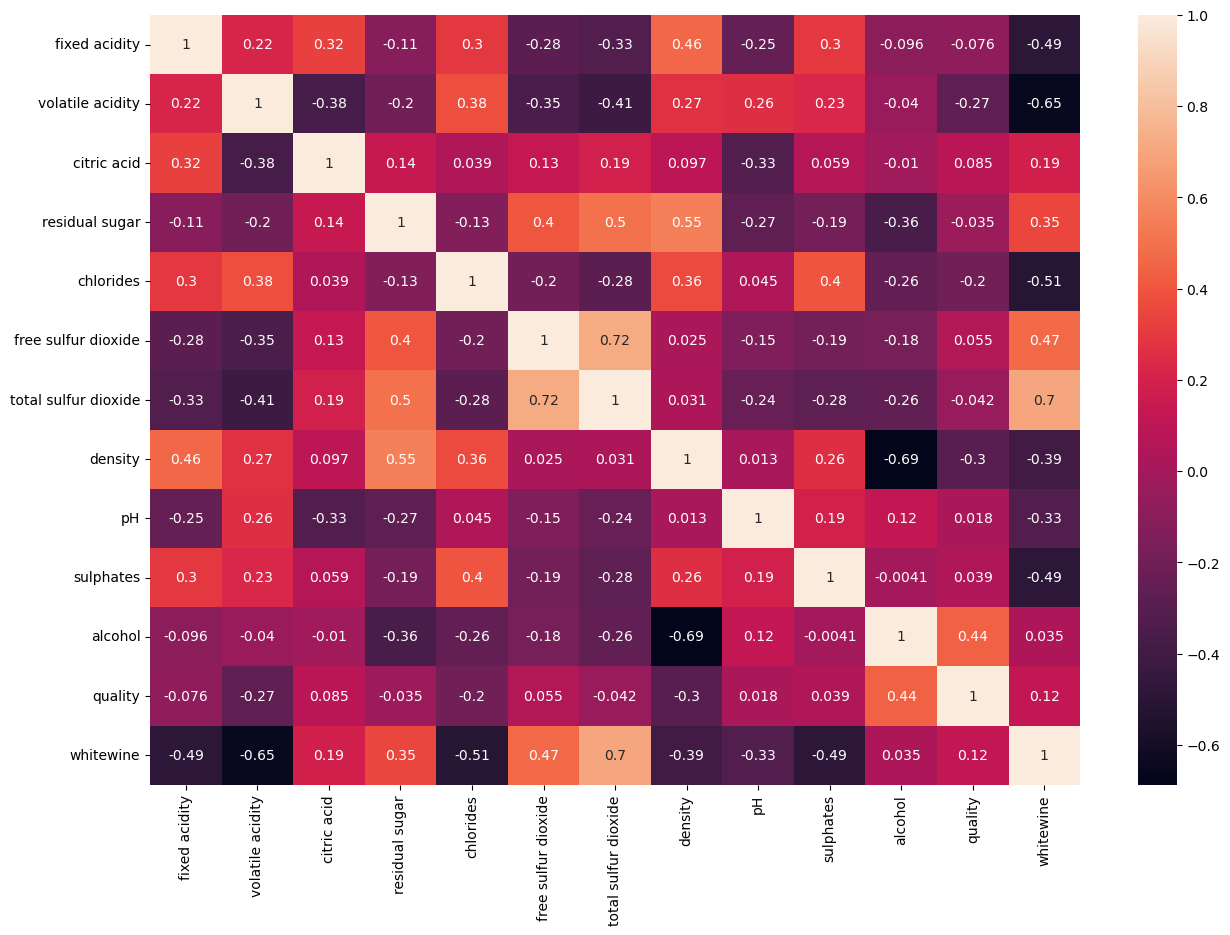

In [10]:
# heatmap review
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(),annot=True)
plt.show()

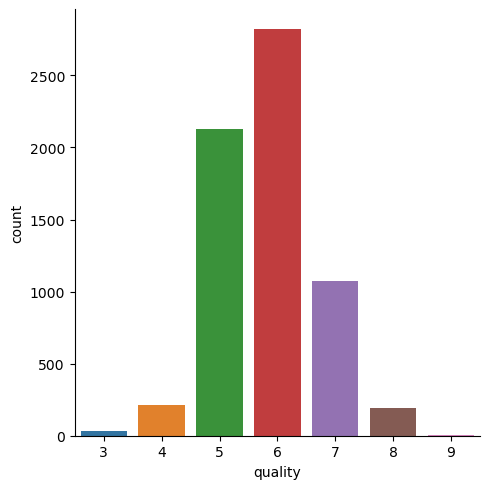

In [11]:
# comparison of quality values ​​(a circle diagram may also be preferred)
plot= sns.catplot(x='quality', data = df1, kind = 'count')

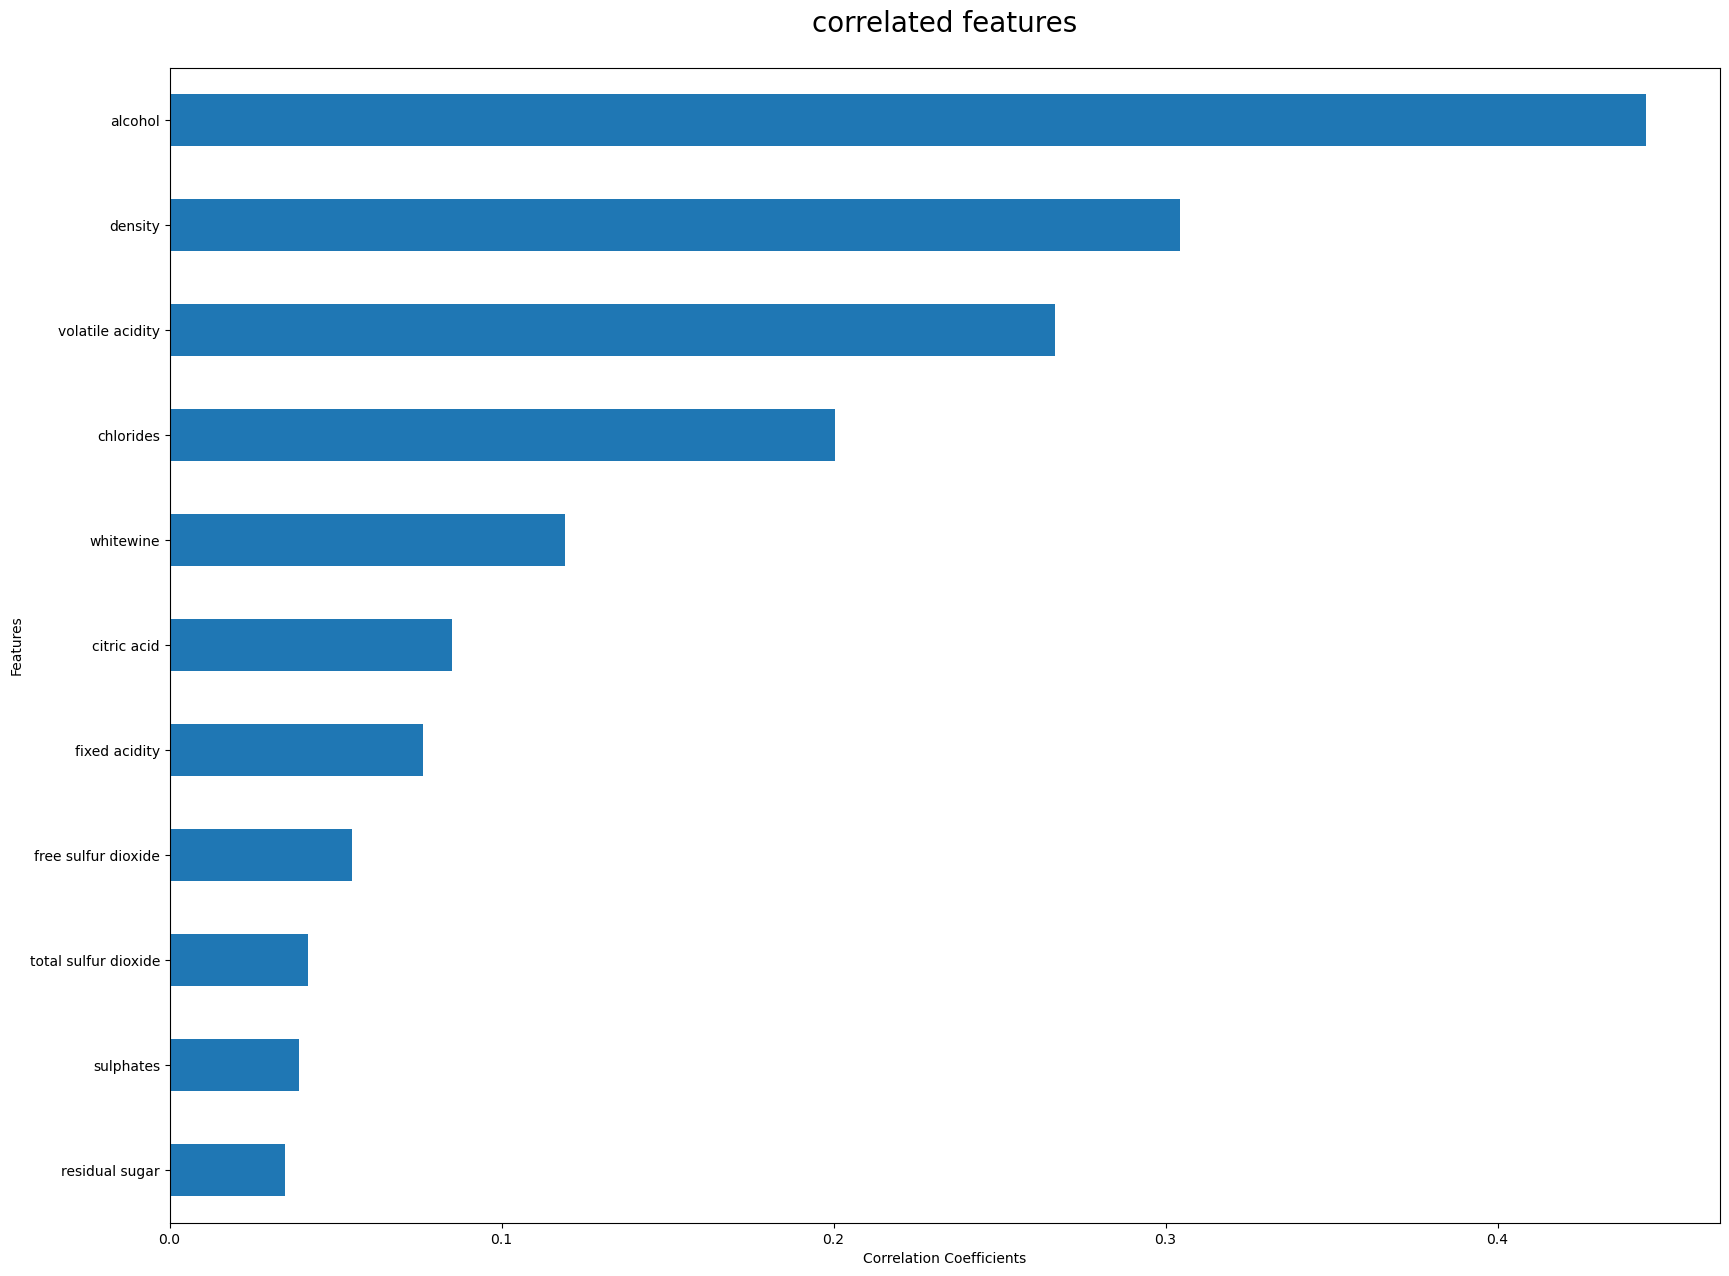

In [12]:
# looking for correlations with quality
plt.figure(figsize=(20,15))
df1.corr()['quality'].apply(lambda x: abs(x)).sort_values(ascending=False).iloc[1:12][::-1].plot(kind='barh') 
plt.title("correlated features", size=20, pad=26)
plt.xlabel("Correlation Coefficients")
plt.ylabel("Features")
plt.show()


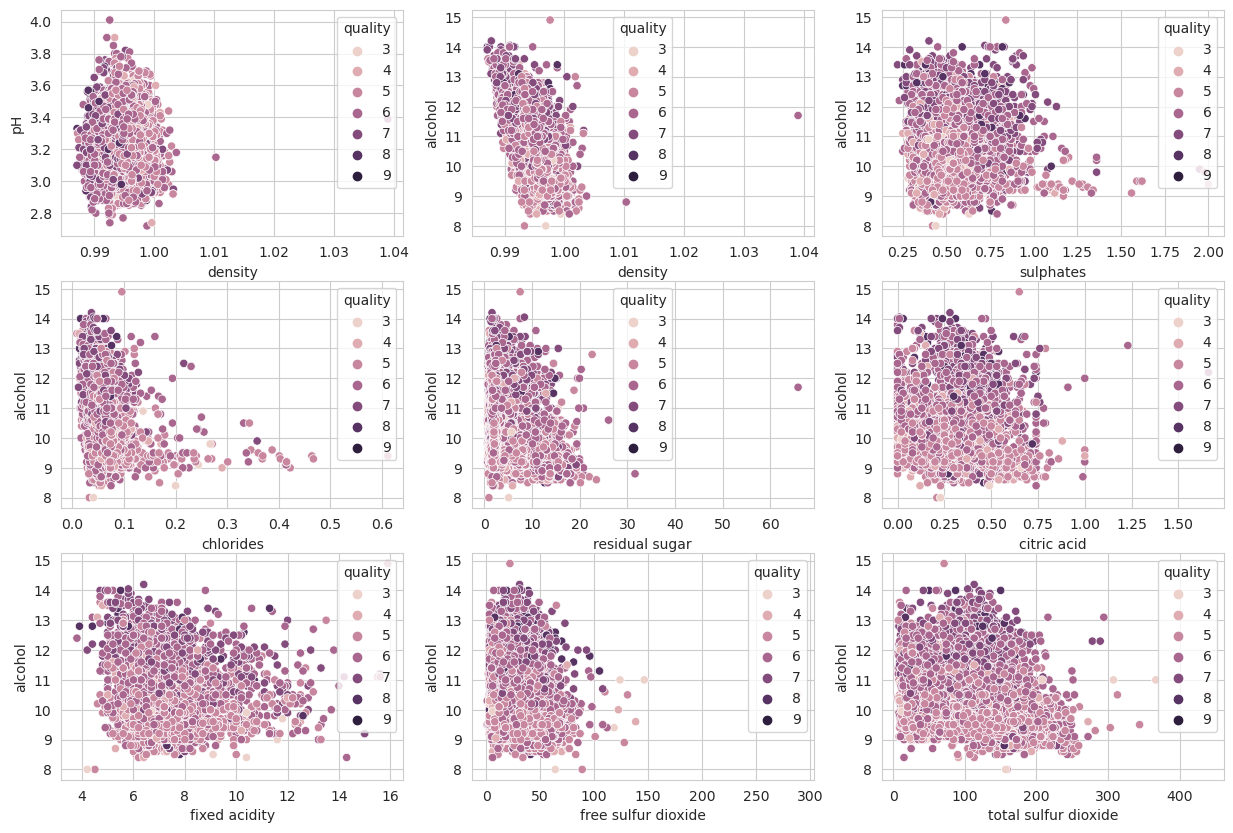

In [13]:
# How does the quality change with the change in two different features (I made 9) but for detailed review
# This figure can be increased up to 20-30-40 pieces.
sns.set_style('whitegrid')
fig,ax = plt.subplots(nrows=3,ncols=3,figsize=(15,10))
ax = ax.flatten()
sns.scatterplot(ax=ax[0],x='density',y='pH',data=wine1,hue='quality')
sns.scatterplot(ax=ax[1],x='density',y='alcohol',data=wine1,hue='quality')
sns.scatterplot(ax=ax[2],x='sulphates',y='alcohol',data=wine1,hue='quality')
sns.scatterplot(ax=ax[3],x='chlorides',y='alcohol',data=wine1,hue='quality')
sns.scatterplot(ax=ax[4],x='residual sugar',y='alcohol',data=wine1,hue='quality')
sns.scatterplot(ax=ax[5],x='citric acid',y='alcohol',data=wine1,hue='quality')
sns.scatterplot(ax=ax[6],x='fixed acidity',y='alcohol',data=wine1,hue='quality')
sns.scatterplot(ax=ax[7],x='free sulfur dioxide',y='alcohol',data=wine1,hue='quality')
sns.scatterplot(ax=ax[8],x='total sulfur dioxide',y='alcohol',data=wine1,hue='quality')
plt.show()

In [14]:
# separating my target and feature sets
X = df1.drop('quality', axis = 1).values
y = df1['quality']

In [15]:
# Model selection and model application
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
clf =RandomForestClassifier(n_estimators=800,max_features=10,random_state=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=13)


In [16]:
# Printing numeric numbers of train, target and test data on console, 20% of dataset is test set 
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5170, 12)
y_train shape: (5170,)
X_test shape: (1293, 12)
y_test shape: (1293,)


In [17]:
# The part where we fit the module and output the accuracy value
clf= RandomForestClassifier()
clf= clf.fit(X_train,y_train)
y_pred =clf.predict(X_test)
print("Accuracy :" ,metrics.accuracy_score(y_test,y_pred))

Accuracy : 0.7006960556844548


In [18]:
# The part where we visualize the confusion matrix output and matrix values ​​in the heatmap
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, auc, roc_curve, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 1)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

[[  0   0   6   1   0   0   0]
 [  0   6  17  12   1   0   0]
 [  0   1 310 123   5   0   0]
 [  0   0  64 463  39   0   0]
 [  0   0   4  91 111   0   0]
 [  0   0   1  10  10  16   0]
 [  0   0   0   1   1   0   0]]


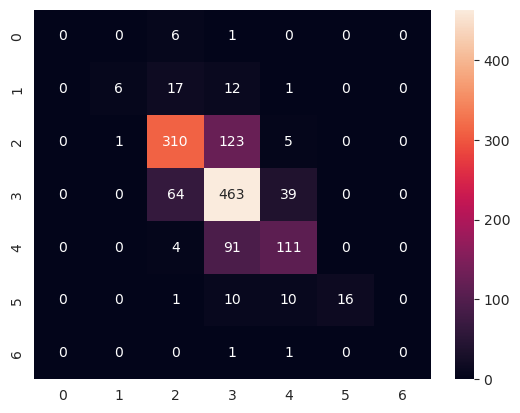

In [19]:
y_pred_rf = rf.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
cm1 = confusion_matrix(y_test,y_pred)
import seaborn as sns
sns.heatmap(cm1,annot= True, fmt='d', cmap='rocket')
print(conf_mat)